In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2 
import random 
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf


In [2]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(r"C:\Users\kshiv\OneDrive\Desktop\nirajdata\NULL_CLASS\archive (8)\train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)
data_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory(r"C:\Users\kshiv\OneDrive\Desktop\nirajdata\NULL_CLASS\archive (8)\test/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation("relu")(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)

    return x

In [4]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation("relu")(x)
    x=Dropout(0.25)(x)
    return x

In [5]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,64,(3,3))
    conv_2=Convolution(conv_1,128,(5,5))
    conv_3=Convolution(conv_2,512,(3,3))
    conv_4=Convolution(conv_3,512,(5,5))
    flatten=Flatten()(conv_3)
    dense_1=Dense_f(flatten,256)
    dense_2=Dense_f(dense_1,512)
    output=Dense(7,activation="softmax")(dense_2)
    model=Model(inputs=[inputs],outputs=[output])
    opt=Adam(learning_rate=0.0005)
    model.compile(loss=["categorical_crossentropy"],optimizer=opt,metrics=["accuracy"])
    return model

In [6]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,04

 Total params: 5,655,815 (21.58 MB)

 Trainable params: 5,652,871 (21.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [8]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model_weights1.weights.h5",monitor="val_accuracy",save_weights_only=True,mode="max",verbose=1)
reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=2,min_lr=0.00001)
callbacks=[checkpoint]

In [9]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)
    


Epoch 1/15


C:\Users\kshiv\anaconda3\envs\ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2831 - loss: 1.9051
Epoch 1: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.2833 - loss: 1.9048 - val_accuracy: 0.3966 - val_loss: 1.6003
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:21 718ms/step - accuracy: 0.3438 - loss: 1.6067
Epoch 2: saving model to model_weights1.weights.h5


C:\Users\kshiv\anaconda3\envs\ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.3438 - loss: 1.6067 - val_accuracy: 0.6000 - val_loss: 1.4953
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.4337 - loss: 1.4828
Epoch 3: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.4338 - loss: 1.4827 - val_accuracy: 0.4626 - val_loss: 1.3814
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:34 614ms/step - accuracy: 0.4688 - loss: 1.2730
Epoch 4: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.4688 - loss: 1.2730 - val_accuracy: 0.5000 - val_loss: 1.1469
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.4967 - loss: 1.3166
Epoch 5: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 340s 758ms/step - accuracy: 0.4967 - loss: 1.3166 - val_accuracy: 0.4629 - val_loss: 1.4669
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:08 691ms/step - accuracy: 0.5625 - loss: 1.0294
Epoch 6: savin

In [10]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.5800 - loss: 1.1232


[1.1052762269973755, 0.5834494233131409]

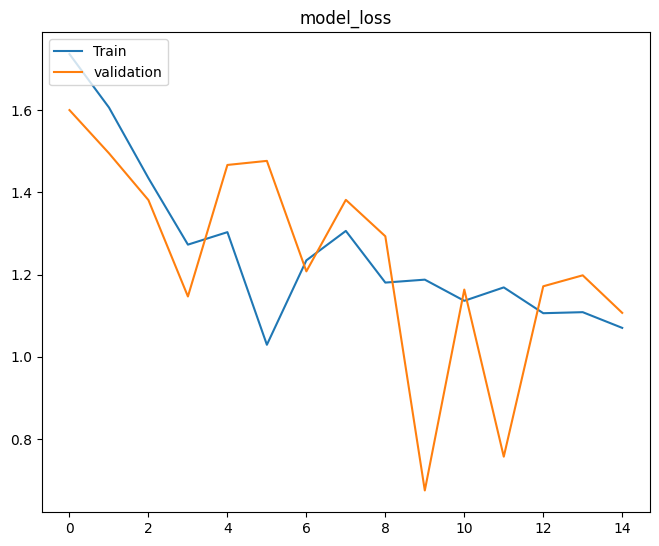

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model_loss")
plt.legend(["Train","validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)
           

In [12]:
model_json=model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json)